In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cf_units

df = pd.read_csv("datasets/co2_CMIP7_mon_000101-099912.csv")
df = pd.read_csv("datasets/co2_CMIP6Plus_mon_000101-202212.csv")
df.describe()

,bnds,co2
count,48528.000000,48528.000000
mean,0.500000,282.613952
std,0.500005,15.555042
min,0.000000,273.187175
25%,0.000000,277.522040
50%,0.500000,279.284266
75%,1.000000,281.457419
max,1.000000,418.957985


In [2]:
data_path = "../../../../.esgpull/data/input4MIPs"

for gas in ["ch4", "co2"]:
    era = "CMIP6Plus"
    freq = "mon"
    id = "000101-202212"
    p1=f"/{era}/CMIP/CR/CR-CMIP-0-3-0/atmos/{freq}/{gas}/gm/v20240806/{gas}_input4MIPs_GHGConcentrations_CMIP_CR-CMIP-0-3-0_gm_{id}.nc"
    d = xr.open_dataset(data_path + p1)


C:\Users\FlorenceBockting\miniconda3\envs\earth-observations\Lib\site-packages\xarray\coding\times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\FlorenceBockting\miniconda3\envs\earth-observations\Lib\site-packages\xarray\coding\times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\FlorenceBockting\miniconda3\envs\earth-observations\Lib\site-packages\xarray\core\indexing.py:514: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_arra

In [39]:

import cf_units
import datetime
d.time.attrs["time"]

KeyError: 'time'

In [60]:
years = [d.time.values[i].year for i in range(len(d.time))]
months = [d.time.values[i].month for i in range(len(d.time))]
days = [d.time.values[i].day for i in range(len(d.time))]

In [65]:
df = pd.DataFrame(
    dict(
        year = [d.time.values[i].year for i in range(len(d.time))],
        month = [d.time.values[i].month for i in range(len(d.time))],
        day = [d.time.values[i].day for i in range(len(d.time))],
        co2 = d.co2.values
    )
)

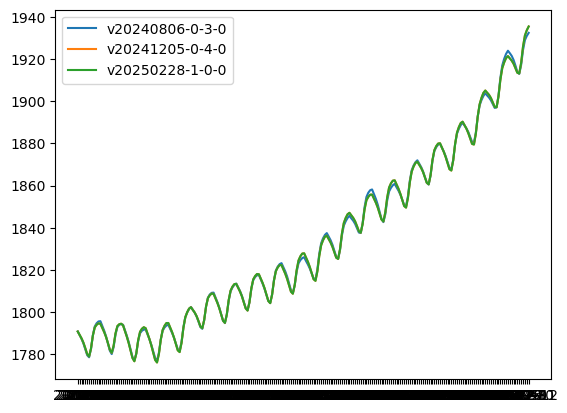

In [165]:
import numpy as np

for version in np.unique(df1["version"]):
    plt.plot(df1[df1["version"] == version]["year_month"], df1[df1["version"] == version]["values"], label=version)
    plt.legend()

In [155]:
df1 = pd.read_csv("datasets/prep_co2_CMIP6Plus_mon_000101-202212_v20240806.csv").drop("Unnamed: 0", axis=1)
df2 = pd.read_csv("datasets/prep_co2_CMIP6Plus_mon_175001-202212_v20241205.csv").drop("Unnamed: 0", axis=1)
df3 = pd.read_csv("datasets/prep_co2_CMIP7_mon_175001-202212_v20250228.csv").drop("Unnamed: 0", axis=1)

d_co2 = df1.merge(df2, how="outer").merge(df3, how="outer")

,year,month,version,gas,freq,era,values,year_month
0,2003,1,v20240806-0-3-0,co2,mon,CMIP6Plus,376.191776,2003-1
1,2003,1,v20241205-0-4-0,co2,mon,CMIP6Plus,375.546630,2003-1
2,2003,1,v20250228-1-0-0,co2,mon,CMIP7,375.546630,2003-1
3,2003,2,v20240806-0-3-0,co2,mon,CMIP6Plus,376.690423,2003-2
4,2003,2,v20241205-0-4-0,co2,mon,CMIP6Plus,376.075680,2003-2
...,...,...,...,...,...,...,...,...
715,2022,11,v20241205-0-4-0,co2,mon,CMIP6Plus,418.232330,2022-11
716,2022,11,v20250228-1-0-0,co2,mon,CMIP7,418.232330,2022-11
717,2022,12,v20240806-0-3-0,co2,mon,CMIP6Plus,418.739124,2022-12
718,2022,12,v20241205-0-4-0,co2,mon,CMIP6Plus,419.259430,2022-12


In [132]:
import os

for file in os.listdir("datasets"):
    if file.startswith("prep_co2"):
        df=pd.read_csv(os.path.join("datasets", file))
        df.join(df)


   Unnamed: 0  year  month         co2 year_month
0           0  2003      1  376.191776     2003-1
1           1  2003      2  376.690423     2003-2
2           2  2003      3  377.040571     2003-3
3           3  2003      4  377.220461     2003-4
   Unnamed: 0  year  month        co2 year_month
0           0  2003      1  375.54663     2003-1
1           1  2003      2  376.07568     2003-2
2           2  2003      3  376.52676     2003-3
3           3  2003      4  376.85886     2003-4
   Unnamed: 0  year  month        co2 year_month
0           0  2003      1  375.54663     2003-1
1           1  2003      2  376.07568     2003-2
2           2  2003      3  376.52676     2003-3
3           3  2003      4  376.85886     2003-4


In [126]:
import numpy as np

np.stack(df_co2

ValueError: all input arrays must have the same shape

In [118]:
import itertools

ids = ["000101-202212", "000101-099912", "100001-174912", "175001-202212"]
eras = ["CMIP6Plus", "CIMP7"]
gasses = ["ch4", "co2"]
freq = "mon"

for era, gas, id in itertools.product(eras, gasses, ids):
    try:
        pd.read_csv(f"datasets/{gas}_{era}_mon_{id}.csv")
    except:
        continue
    else:
        df = pd.read_csv(f"datasets/{gas}_{era}_mon_{id}.csv")
        df_prep = df[df["year"] > 2002].groupby(["year", "month"]).agg({gas: "mean"}).reset_index()

        df_prep["year_month"] = df_prep["year"].values.astype(str) + "-" + df_prep["month"].values.astype(str)

        df_prep.to_csv("datasets/prep_" + gas + "_" + era + "_" + freq + id + ".csv")
        #ax.plot(df_prep["year_month"], df_prep[gas], label=gas+"-"+era)
        #plt.title(era+": monthly avg. "+gas)


In [116]:
list(itertools.product(eras, gasses, ids))


[('CMIP6Plus', 'ch4', '000101-202212'),
 ('CMIP6Plus', 'ch4', '000101-099912'),
 ('CMIP6Plus', 'ch4', '100001-174912'),
 ('CMIP6Plus', 'ch4', '175001-202212'),
 ('CMIP6Plus', 'co2', '000101-202212'),
 ('CMIP6Plus', 'co2', '000101-099912'),
 ('CMIP6Plus', 'co2', '100001-174912'),
 ('CMIP6Plus', 'co2', '175001-202212'),
 ('CIMP7', 'ch4', '000101-202212'),
 ('CIMP7', 'ch4', '000101-099912'),
 ('CIMP7', 'ch4', '100001-174912'),
 ('CIMP7', 'ch4', '175001-202212'),
 ('CIMP7', 'co2', '000101-202212'),
 ('CIMP7', 'co2', '000101-099912'),
 ('CIMP7', 'co2', '100001-174912'),
 ('CIMP7', 'co2', '175001-202212')]

In [108]:
gas = "co2"
era = "CMIP6Plus"

pd.read_csv(f"datasets/{gas}_{era}_mon.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/co2_CMIP6Plus_mon.csv'